In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TIME_STEP = 10
INPUT_SIZE = 1
CELL_SIZE = 32
LR = 0.02  

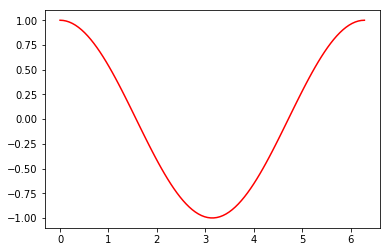

In [8]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x = np.sin(steps)
y = np.cos(steps)
plt.plot(steps, y, 'r-', label='target (cos)')
plt.show()

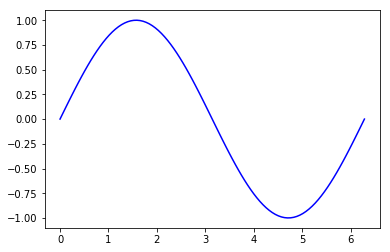

In [9]:
plt.plot(steps, x, 'b-',label="input sin")
plt.show()

In [10]:
tf_x = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])
tf_y = tf.placeholder(tf.float32, [None, TIME_STEP, INPUT_SIZE])

In [11]:
rnn_cell = tf.contrib.rnn.BasicRNNCell(num_units=CELL_SIZE)
init_s = rnn_cell.zero_state(batch_size=1, dtype=tf.float32)
outputs, final_s = tf.nn.dynamic_rnn(rnn_cell,tf_x,initial_state=init_s,time_major=False)

Instructions for updating:
Use the retry module or similar alternatives.


In [12]:
outs2D = tf.reshape(outputs, [-1, CELL_SIZE]) 
net_outs2D = tf.layers.dense(outs2D, INPUT_SIZE)
outs = tf.reshape(net_outs2D, [-1, TIME_STEP, INPUT_SIZE])

In [13]:
loss = tf.losses.mean_squared_error(labels=tf_y, predictions=outs)
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

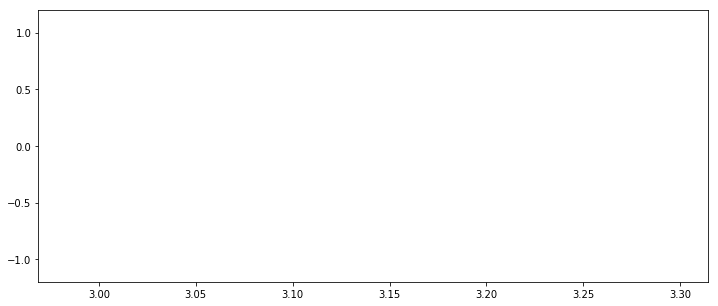

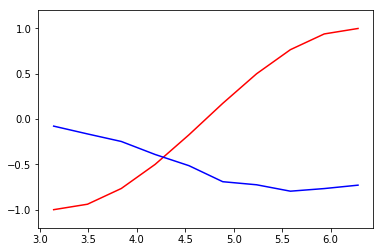

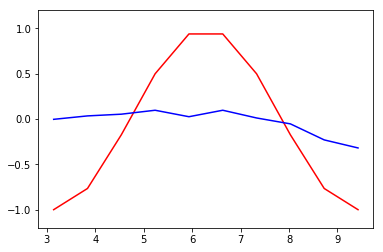

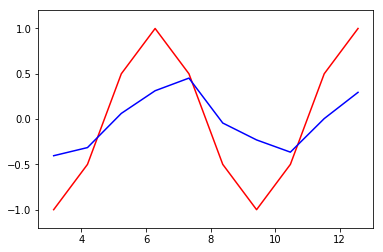

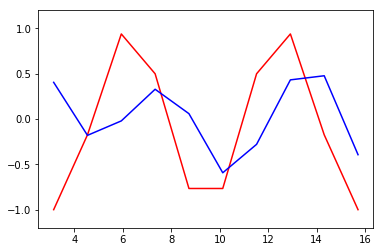

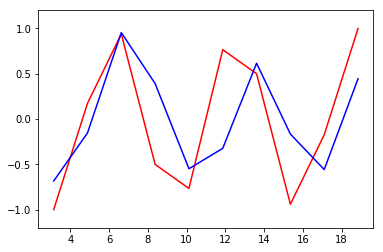

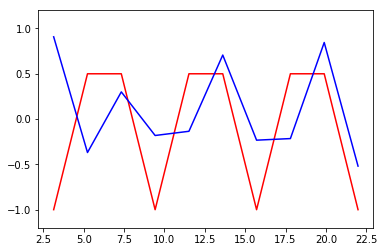

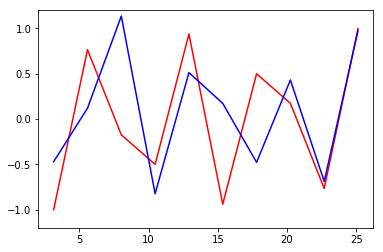

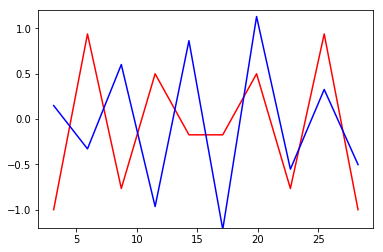

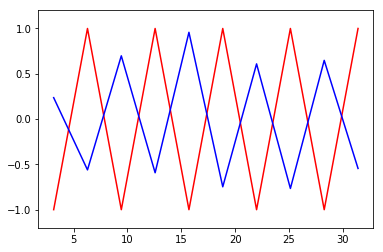

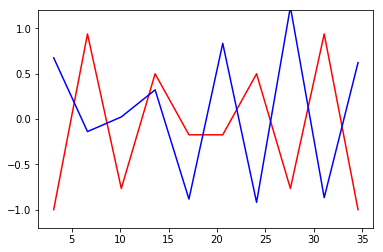

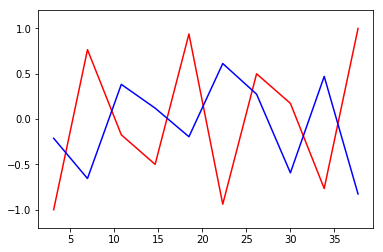

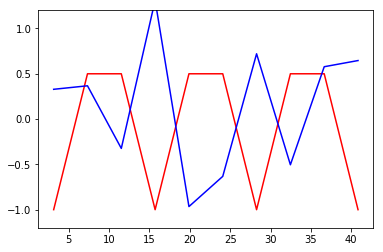

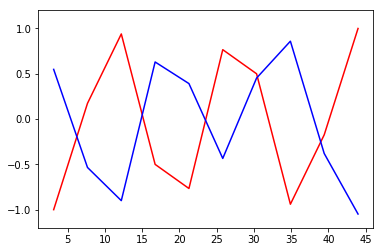

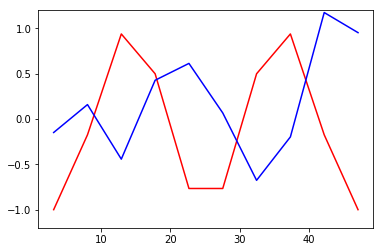

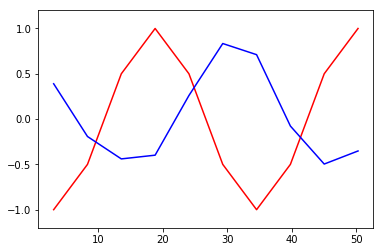

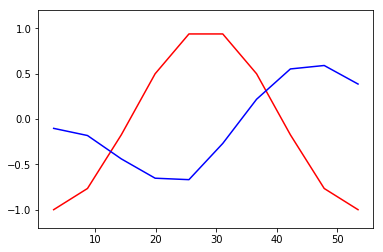

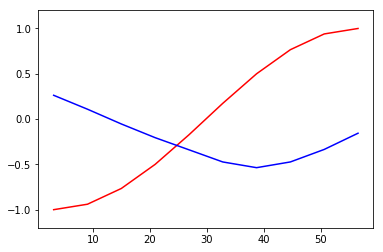

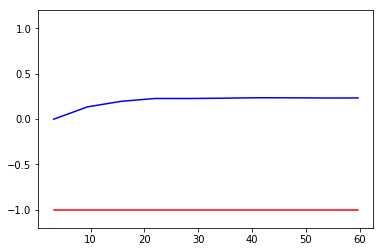

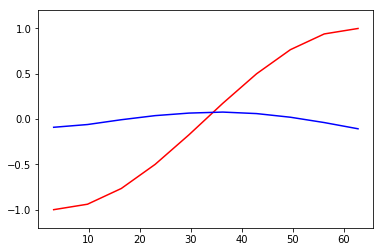

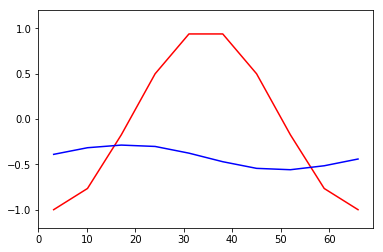

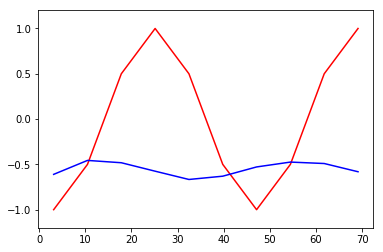

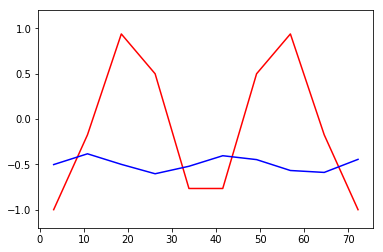

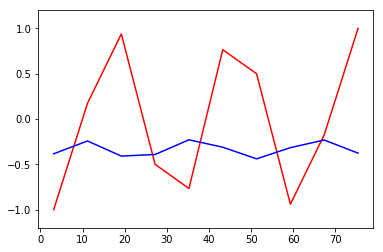

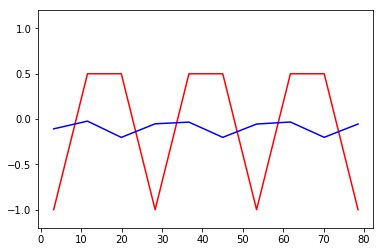

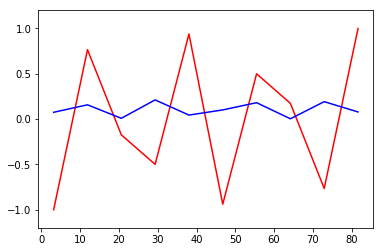

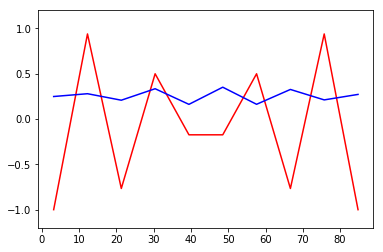

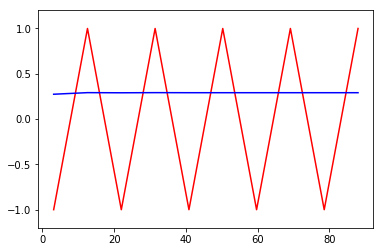

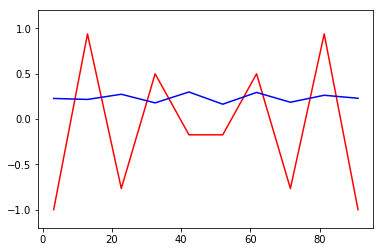

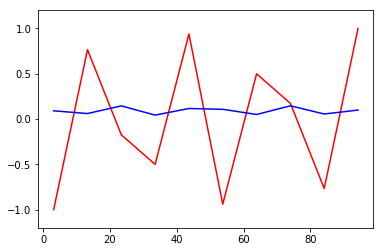

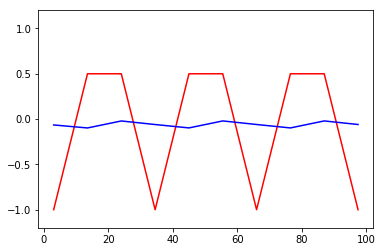

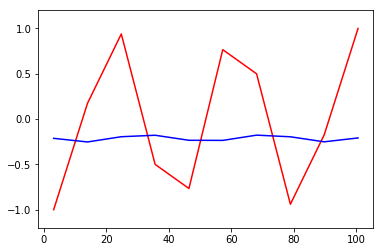

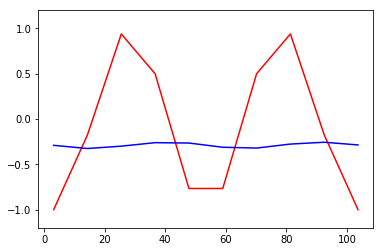

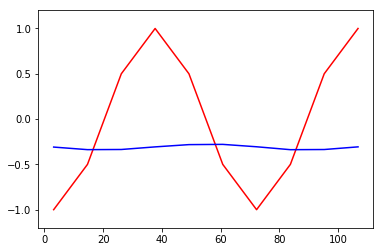

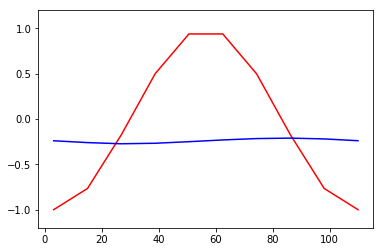

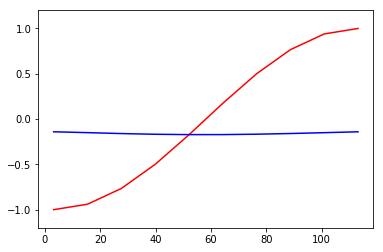

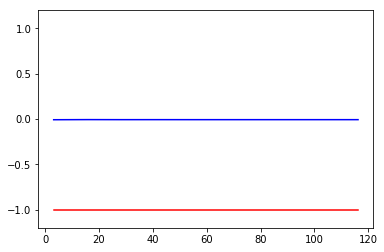

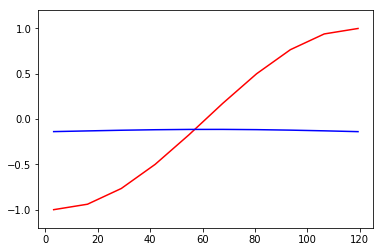

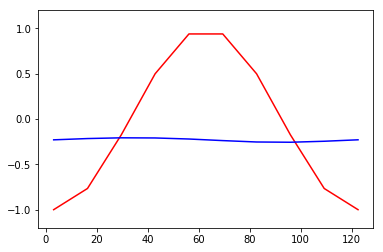

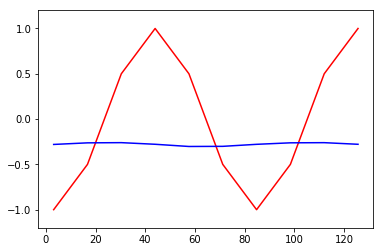

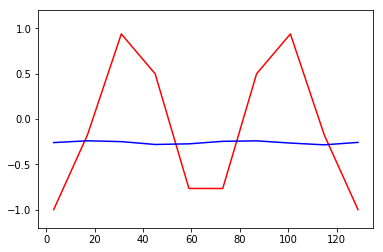

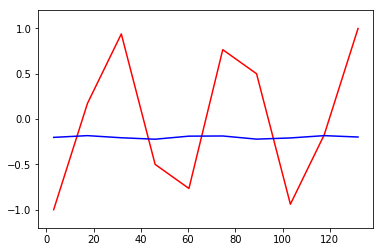

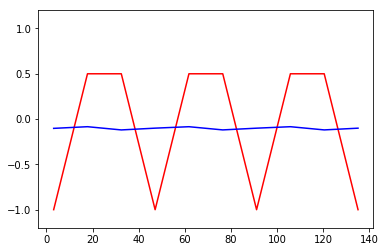

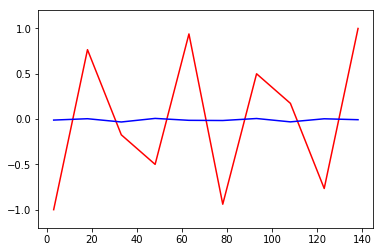

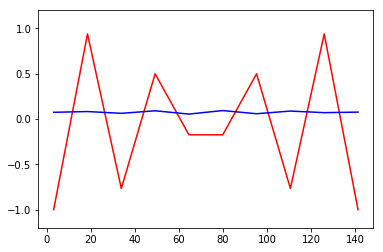

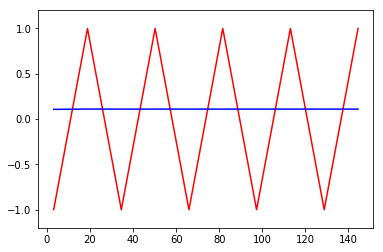

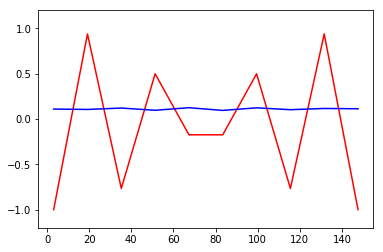

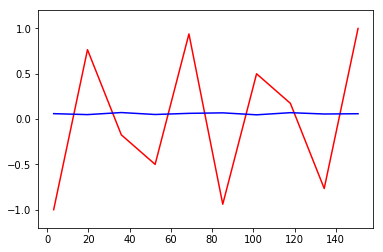

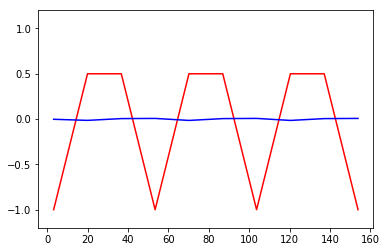

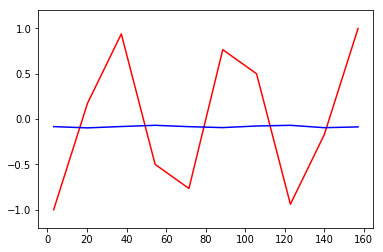

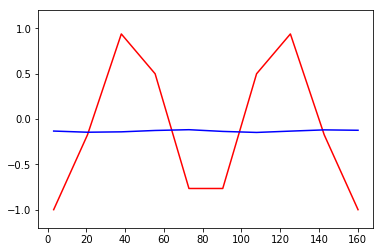

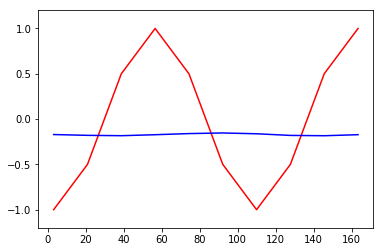

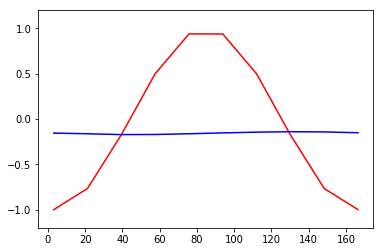

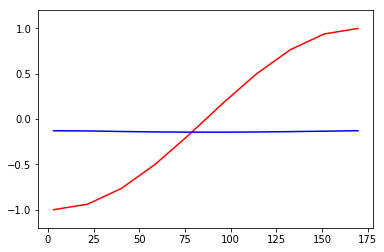

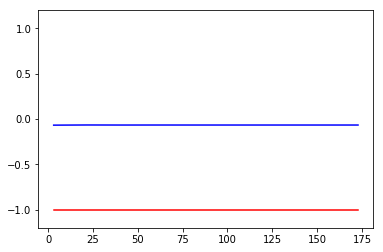

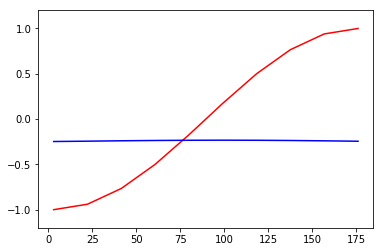

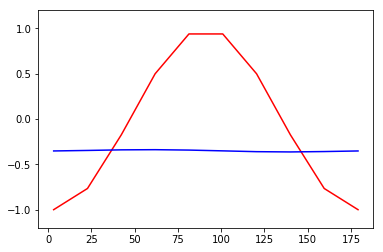

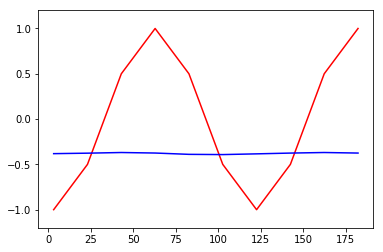

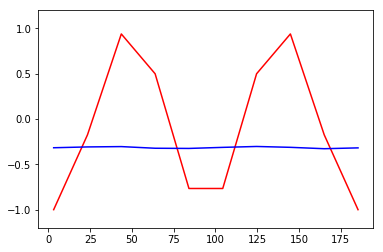

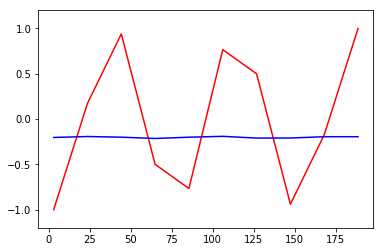

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    plt.figure(1, figsize=(12, 5))
    plt.ion() 
    
    for step in range(60):
        start, end = np.pi, (step+1)* np.pi
        steps = np.linspace(start, end, TIME_STEP)
        x = np.sin(steps)[np.newaxis, :, np.newaxis] 
        y = np.cos(steps)[np.newaxis, :, np.newaxis]
        if 'final_s_' not in globals():              
            feed_dict = {tf_x: x, tf_y: y}
        else:                                        
            feed_dict = {tf_x: x, tf_y: y, init_s: final_s_}
        _, pred_, final_s_ = sess.run([train_op, outs, final_s], feed_dict)

        plt.plot(steps, y.flatten(), 'r-')
        plt.plot(steps, pred_.flatten(), 'b-')
        plt.ylim((-1.2, 1.2))
        plt.draw() 
        plt.pause(0.05)
    plt.ioff()
    plt.show()